In [0]:
import pandas as pd
import seaborn as sns
import datetime 
import numpy as np

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/leonpalafox/mlclase/master/Unsupervised/data_clustering/uber-raw-data-jul14.csv")

In [4]:
#df["DateTime_Fixed"] = 
fecha = pd.to_datetime(df["Date/Time"][0])
fecha

Timestamp('2014-07-01 00:03:00')

In [0]:
df["fecha"] = pd.to_datetime(df["Date/Time"])

In [0]:
df["hora"] = df["fecha"].apply(lambda x : x.hour)

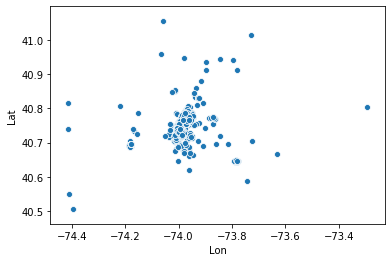

In [7]:
sns.scatterplot(x = "Lon", y = "Lat", data = df)

In [8]:
import folium 
mapit = folium.Map(location = [40.758611, -73.976389], zoom_start= 12)
#mapit
#mapit.save("mapa.html")
for idx in range(0, df.shape[0]):
  folium.Marker(location = [df.Lat.values[idx], df.Lon.values[idx]]).add_to(mapit)
mapit  

In [9]:
df_map = df[df["hora"] == 5]
mapit = folium.Map(location = [40.758611, -73.976389], zoom_start= 12)
#mapit
#mapit.save("mapa.html")
for idx in range(0, df_map.shape[0]):
  folium.Marker(location = [df_map.Lat.values[idx], df_map.Lon.values[idx]]).add_to(mapit)
mapit 

In [10]:
from folium.plugins import HeatMap
mapit = folium.Map(location = [40.758611, -73.976389], zoom_start= 12)
hm_wide = HeatMap(list(zip(df_map.Lat.values, df_map.Lon.values)))
mapit.add_child(hm_wide)
mapit





In [0]:
df2 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

In [24]:
df2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990.0
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428.0
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576.0
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,296,296.0
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,124,124.0


In [25]:
df_map2 = df2[["Country/Region", "Lat", "Long", "3/2/20"]]
df_map2.groupby("Country/Region").sum().sort_values(["3/2/20"], ascending = False)

,Lat,Long,3/2/20
Country/Region,,,
Mainland China,1035.61502,3457.8300,80026
South Korea,36.00000,128.0000,4335
Italy,43.00000,12.0000,2036
Iran,32.00000,53.0000,1501
Others,35.44370,139.6380,705
...,...,...,...
Republic of Ireland,53.14240,-7.6921,0
Cyprus,35.12640,33.4299,0
Saint Barthelemy,17.90000,-62.8333,0


In [26]:
mapit = folium.Map(location = [40.758611, -73.976389], zoom_start= 12)
for idx in range(0, df_map2.shape[0]):
  folium.Marker(location = [df_map2.Lat.values[idx], df_map2.Long.values[idx]]).add_to(mapit)
mapit 


In [0]:
#tarea:
#Mapa del coronavirus ( creative way bitch )
#
#
#
#
#
#




In [27]:
df2[df2["Country/Region"] == "Mexico"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
105,NaN,Mexico,23.6345,-102.5528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,5,5,5,5,6,6,7,7.0


In [28]:
df2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990.0
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428.0
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576.0
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,296,296.0
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,124,124.0


In [0]:
#get first nonzero
def getFirstNonzero(arr):
  x = (arr!=0).argmax(axis=0)
  return x



In [30]:
faFrame = pd.DataFrame()
for i in range(0, df2.shape[0]):
  x = getFirstNonzero(df2.iloc[i][5:])
  faFrame = pd.concat([faFrame, pd.DataFrame([x])])
  #df.loc[i, "firstAppearance"] = getFirstNonzero(df2.iloc[i][5:])
#df2.iloc[[0]]["firstAppearance"]
faFrame.index = df2.index
df2.insert(4, "firstAppearance", faFrame)
df2["firstAppearance"] = faFrame
df2["firstAppearance"] = pd.to_datetime(df2["firstAppearance"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


In [31]:
df2.head()

,Province/State,Country/Region,Lat,Long,firstAppearance,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,2020-01-23,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990.0
1,Beijing,Mainland China,40.1824,116.4142,2020-01-23,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428.0
2,Chongqing,Mainland China,30.0572,107.8740,2020-01-23,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576.0
3,Fujian,Mainland China,26.0789,117.9874,2020-01-23,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,296,296.0
4,Gansu,Mainland China,36.0611,103.8343,2020-01-23,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,124,124.0


In [32]:
import datetime
import numpy as np
dList = df2["firstAppearance"].map(lambda x: (datetime.datetime.now() - x).days)
df2.insert(5, "DaysSinceFirstOutbreak", dList)
#df2["DaysSinceFirstOutbreak"] = dList

bList = [dList.quantile(x) for x in np.arange(4) / 4]
bList.append(df2["DaysSinceFirstOutbreak"].max())

df2.insert(6, "SinceCategory", pd.cut(df2["DaysSinceFirstOutbreak"], bList, include_lowest=True))

#df2["SinceCategory"] = pd.cut(df2["DaysSinceFirstOutbreak"], bList, include_lowest=True)
df2.head()

,Province/State,Country/Region,Lat,Long,firstAppearance,DaysSinceFirstOutbreak,SinceCategory,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,2020-01-23,47,"(38.0, 47.0]",1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990.0
1,Beijing,Mainland China,40.1824,116.4142,2020-01-23,47,"(38.0, 47.0]",14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428.0
2,Chongqing,Mainland China,30.0572,107.8740,2020-01-23,47,"(38.0, 47.0]",6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576.0
3,Fujian,Mainland China,26.0789,117.9874,2020-01-23,47,"(38.0, 47.0]",1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,296,296.0
4,Gansu,Mainland China,36.0611,103.8343,2020-01-23,47,"(38.0, 47.0]",0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,124,124.0


In [33]:
df2.head()

,Province/State,Country/Region,Lat,Long,firstAppearance,DaysSinceFirstOutbreak,SinceCategory,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,2020-01-23,47,"(38.0, 47.0]",1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,989,990,990,990,990,990,990,990,990,990,990,990.0
1,Beijing,Mainland China,40.1824,116.4142,2020-01-23,47,"(38.0, 47.0]",14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,410,410,411,413,414,414,418,418,422,426,428,428.0
2,Chongqing,Mainland China,30.0572,107.8740,2020-01-23,47,"(38.0, 47.0]",6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576.0
3,Fujian,Mainland China,26.0789,117.9874,2020-01-23,47,"(38.0, 47.0]",1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,296,296,296,296,296,296,296,296,296,296,296,296.0
4,Gansu,Mainland China,36.0611,103.8343,2020-01-23,47,"(38.0, 47.0]",0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,91,102,119,120,124,124.0


In [34]:
df2.insert(7, "IsDeaccelerating", False)
def GetDeacceleratingRate(datfra, days = 5):
  for i in range(0, datfra.shape[0]):
    diff = (datfra.iloc[i][datfra.columns[-1]] - datfra.iloc[i][datfra.columns[-5]] ) 
    past =  datfra.iloc[i][datfra.columns[-days]]
    x = diff / past
    if past == 0:
      datfra.loc[i,"IsDeaccelerating"] = "Not enough info"
      continue
    if x > 0:
      datfra.loc[i,"IsDeaccelerating"] = "False"
    elif x < 0:
      datfra.loc[i,"IsDeaccelerating"] = "True"
    else:
      datfra.loc[i,"IsDeaccelerating"] = "Stable"

GetDeacceleratingRate(df2, days = 5)
df2.groupby("IsDeaccelerating").count()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


,Province/State,Country/Region,Lat,Long,firstAppearance,DaysSinceFirstOutbreak,SinceCategory,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
IsDeaccelerating,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,39,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
Not enough info,83,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,101
Stable,45,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,56
True,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [0]:
df21 = df2[df2["IsDeaccelerating"] == "False"]
df22 = df2[df2["IsDeaccelerating"] == "Stable"]
df23 = df2[df2["IsDeaccelerating"] == "True"]
df24 = df2[df2["IsDeaccelerating"] == "Not enough info"]

In [36]:
mapit = folium.Map(location = [40.758611, -73.976389], zoom_start= 6)
for idx in range(0, df21.shape[0]):
  stringPopup = "In the Province/State of {} in the Country/Region of {}, the COVID-19 first appeared in {}, it has been {} days since first outbreak, is in the class of {} range of days, and the virus status of deaccelerating is {} ".format(
      df21["Province/State"].values[idx], df21["Country/Region"].values[idx], df21.iloc[idx]["firstAppearance"].strftime("%Y/%m/%d"), 
      df21.DaysSinceFirstOutbreak.values[idx], df21.SinceCategory.values[idx], df21.IsDeaccelerating.values[idx]
  )
  folium.Marker(location = [df21.Lat.values[idx], df21.Long.values[idx]],
                popup = stringPopup,
                icon=folium.Icon(color="red", icon = "remove", prefix = "glyphicon")).add_to(mapit)

for idx in range(0, df22.shape[0]):
  stringPopup = "In the Province/State of {} in the Country/Region of {}, the COVID-19 first appeared in {}, it has been {} days since first outbreak, is in the class of {} range of days, and the virus status of deaccelerating is {} ".format(
      df22["Province/State"].values[idx], df22["Country/Region"].values[idx], df22.iloc[idx]["firstAppearance"].strftime("%Y/%m/%d"), 
      df22.DaysSinceFirstOutbreak.values[idx], df22.SinceCategory.values[idx], df22.IsDeaccelerating.values[idx]
  )
  folium.Marker(location = [df22.Lat.values[idx], df22.Long.values[idx]],
                popup = stringPopup,
                icon=folium.Icon(color="blue", icon = "minus", prefix = "glyphicon")).add_to(mapit)

for idx in range(0, df23.shape[0]):
  stringPopup = "In the Province/State of {} in the Country/Region of {}, the COVID-19 first appeared in {}, it has been {} days since first outbreak, is in the class of {} range of days, and the virus status of deaccelerating is {} ".format(
      df23["Province/State"].values[idx], df22["Country/Region"].values[idx], df23.iloc[idx]["firstAppearance"].strftime("%Y/%m/%d"), 
      df23.DaysSinceFirstOutbreak.values[idx], df22.SinceCategory.values[idx], df23.IsDeaccelerating.values[idx]
  )
  folium.Marker(location = [df23.Lat.values[idx], df23.Long.values[idx]],
                popup = stringPopup,
                icon=folium.Icon(color="green", icon = "ok", prefix = "glyphicon")).add_to(mapit)

for idx in range(0, df24.shape[0]):
  stringPopup = "In the Province/State of {} in the Country/Region of {}, the COVID-19 first appeared in {}, it has been {} days since first outbreak, is in the class of {} range of days, and the virus status of deaccelerating is {} ".format(
      df24["Province/State"].values[idx], df24["Country/Region"].values[idx], df24.iloc[idx]["firstAppearance"].strftime("%Y/%m/%d"), 
      df24.DaysSinceFirstOutbreak.values[idx], df24.SinceCategory.values[idx], df24.IsDeaccelerating.values[idx]
  )
  folium.Marker(location = [df24.Lat.values[idx], df24.Long.values[idx]],
                popup = stringPopup,
                icon=folium.Icon(color="orange", icon = "remove", prefix = "glyphicon")).add_to(mapit)

mapit 

In [0]:
mapit.save("Mapa.html")

In [0]:
help(folium.Icon)

Help on class Icon in module folium.map:

class Icon(branca.element.MacroElement)
 |  Creates an Icon object that will be rendered
 |  using Leaflet.awesome-markers.
 |  
 |  Parameters
 |  ----------
 |  color : str, default 'blue'
 |      The color of the marker. You can use:
 |  
 |          ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
 |           'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
 |           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
 |           'gray', 'black', 'lightgray']
 |  
 |  icon_color : str, default 'white'
 |      The color of the drawing on the marker. You can use colors above,
 |      or an html color code.
 |  icon : str, default 'info-sign'
 |      The name of the marker sign.
 |      See Font-Awesome website to choose yours.
 |      Warning : depending on the icon you choose you may need to adapt
 |      the `prefix` as well.
 |  angle : int, default 0
 |      The icon will be rotated by this amount of degrees.
 

In [38]:
df2.groupby(["Province/State", "Country/Region"]).sum().sort_values(by = df2.columns[-1])[[df2.columns[-1]]]

,,3/9/20
Province/State,Country/Region,
"Montreal, QC",Canada,0.0
"Omaha, NE (From Diamond Princess)",US,0.0
Northern Territory,Australia,0.0
"Edmonton, Alberta",Canada,0.0
"Montgomery County, TX",US,0.0
...,...,...
Hunan,Mainland China,1018.0
Zhejiang,Mainland China,1215.0
Henan,Mainland China,1272.0


In [39]:
df2.shape

(273, 56)